In [75]:
# %pip install pandas
# %pip install numpy
# %pip install matplotlib
# %pip install openpyxl
# %pip install plotly
# %pip install nbformat
# %pip install seaborn

In [2]:
import pandas as pd
import numpy as np

## Run this once
# excel_file_path = '../data/acled/Africa_1997-2023_Sep29.xlsx'
# df = pd.read_excel(excel_file_path, engine='openpyxl')
# df.to_csv('../data/acled/africa.csv', index=False)

## Then run this
df = pd.read_csv('../data/acled/africa.csv')
df.head()

/var/folders/wb/67n5x4vj6qq_n5t85f5bvtww0000gn/T/ipykernel_38983/18426582.py:10: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../data/acled/africa.csv')


,EVENT_ID_CNTY,EVENT_DATE,YEAR,TIME_PRECISION,DISORDER_TYPE,EVENT_TYPE,SUB_EVENT_TYPE,ACTOR1,ASSOC_ACTOR_1,INTER1,...,LOCATION,LATITUDE,LONGITUDE,GEO_PRECISION,SOURCE,SOURCE_SCALE,NOTES,FATALITIES,TAGS,TIMESTAMP
0,ALG12639,2023-09-26,2023,1,Demonstrations,Protests,Peaceful protest,Protesters (Algeria),Labor Group (Algeria),6,...,Guelma,36.462,7.426,1,El Khabar (Algeria),National,"On 26 September 2023, municipal workers affili...",0,crowd size=no report,1696258811
1,ALG12642,2023-09-26,2023,1,Demonstrations,Protests,Peaceful protest,Protesters (Algeria),Taxi Drivers (Algeria),6,...,Blida,36.469,2.829,1,El Khabar (Algeria),National,"On 26 September 2023, dozens of taxi drivers h...",0,crowd size=dozens,1696258811
2,ALG12635,2023-09-25,2023,1,Demonstrations,Protests,Peaceful protest,Protesters (Algeria),Farmers (Algeria),6,...,Bouira,36.380,3.901,1,El Watan (Algeria),National,"On 25 September 2023, dozens of potato produce...",0,crowd size=dozens,1696258811
3,ALG12637,2023-09-25,2023,1,Demonstrations,Protests,Peaceful protest,Protesters (Algeria),Health Workers (Algeria),6,...,Deb Deb,29.985,9.434,1,Echorouk,National,"On 25 September 2023, health workers held a pr...",0,crowd size=no report,1696258811
4,ALG12645,2023-09-25,2023,2,Demonstrations,Protests,Peaceful protest,Protesters (Algeria),NaN,6,...,Oued Djemaa,36.044,2.361,1,El Watan (Algeria),National,"Around 25 September 2023 (as reported), studen...",0,crowd size=no report,1696258811


In [3]:
# 336525 rows, 31 columns
df.shape

# want: EVENT_DATE, FATALITIES, 
df.columns

Index(['EVENT_ID_CNTY', 'EVENT_DATE', 'YEAR', 'TIME_PRECISION',
       'DISORDER_TYPE', 'EVENT_TYPE', 'SUB_EVENT_TYPE', 'ACTOR1',
       'ASSOC_ACTOR_1', 'INTER1', 'ACTOR2', 'ASSOC_ACTOR_2', 'INTER2',
       'INTERACTION', 'CIVILIAN_TARGETING', 'ISO', 'REGION', 'COUNTRY',
       'ADMIN1', 'ADMIN2', 'ADMIN3', 'LOCATION', 'LATITUDE', 'LONGITUDE',
       'GEO_PRECISION', 'SOURCE', 'SOURCE_SCALE', 'NOTES', 'FATALITIES',
       'TAGS', 'TIMESTAMP'],
      dtype='object')

In [4]:
events = df['EVENT_TYPE'].value_counts()
subevents = df['SUB_EVENT_TYPE'].value_counts()
locations = df['LOCATION'].value_counts()

print(f"Events: {events}\n")
# print(f"Subevents: {subevents}")
print(f"Locations: {locations}")

Events: EVENT_TYPE
Battles                       86360
Violence against civilians    82688
Protests                      78662
Riots                         37022
Strategic developments        27061
Explosions/Remote violence    24732
Name: count, dtype: int64

Locations: LOCATION
Khartoum             1945
Mogadishu            1713
Mogadishu - Hodan    1515
Cape Town            1430
Harare               1405
                     ... 
Obasari                 1
Eburu                   1
Ryando                  1
Namawanga               1
Maheba                  1
Name: count, Length: 35554, dtype: int64


In [10]:
cdf = df[df['EVENT_TYPE'] == 'Violence against civilians']
cdf_filtered = cdf.loc[:, ['EVENT_DATE', 'LOCATION', 'LATITUDE', 'LONGITUDE', 'NOTES', 'FATALITIES', 'TIMESTAMP']]
# cdf.head()
# cdf_filtered

cdf_fatalities = cdf_filtered[cdf_filtered['FATALITIES'] > 4]
cdf_fatalities_show = cdf_filtered[cdf_filtered['FATALITIES'] > 100]

print(cdf_fatalities.shape)
# cdf_fatalities["FATALITIES"].value_counts()

countries = cdf_fatalities["LOCATION"].value_counts()
print(countries)

beni = cdf_fatalities[cdf_fatalities['LOCATION'] == 'Beni']
print(beni.shape)

cdf_fatalities_small = cdf_filtered[(cdf_filtered['FATALITIES'] > 10) & (cdf_filtered['FATALITIES'] < 50)]
print(cdf_fatalities_small.shape)

(8974, 7)
LOCATION
Beni            67
El Fasher       56
Pibor           50
Bunia           48
Bujumbura       43
                ..
Beroroha         1
Ilambohazo       1
Fianarantsoa     1
Toamasina        1
Chazanga         1
Name: count, Length: 4488, dtype: int64
(67, 7)
(3049, 7)


In [19]:
cdf_filtered['YEAR'] = pd.to_datetime(cdf_filtered['EVENT_DATE']).dt.year
yearly_counts = cdf_filtered.groupby('YEAR').size().reset_index(name='COUNT')
yearly_counts = yearly_counts[yearly_counts['YEAR'] != 2023]
print(yearly_counts)


    YEAR  COUNT
0   1997    898
1   1998   1213
2   1999    928
3   2000   1206
4   2001   1156
5   2002   1689
6   2003   1399
7   2004   1259
8   2005   1075
9   2006    863
10  2007   1147
11  2008   1794
12  2009   1177
13  2010   1256
14  2011   1564
15  2012   2216
16  2013   3002
17  2014   3942
18  2015   3721
19  2016   3846
20  2017   4204
21  2018   5573
22  2019   5852
23  2020   7728
24  2021   8598
25  2022   9025


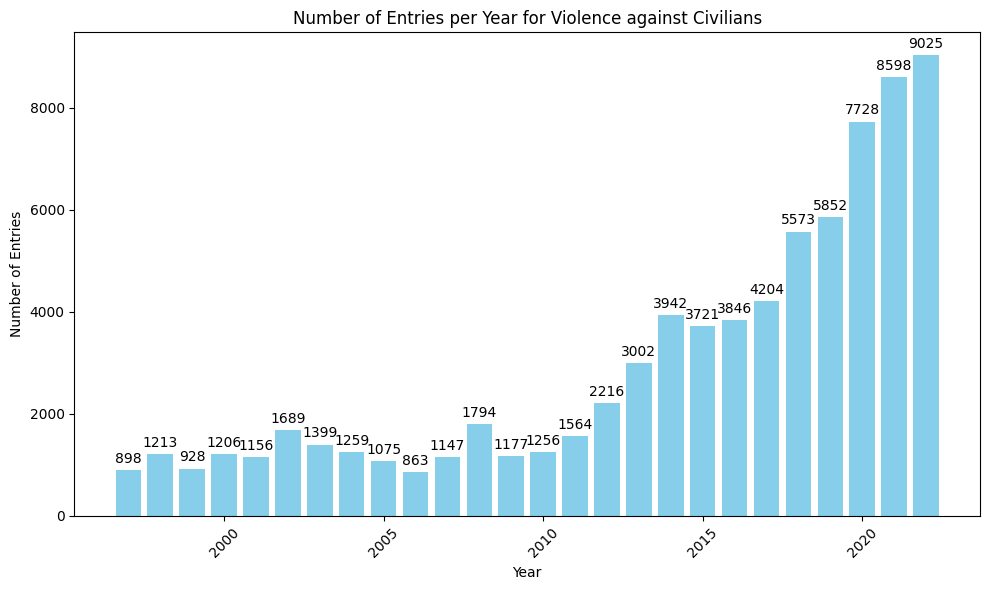

In [33]:
import matplotlib.pyplot as plt

# Extract year and count data
years = yearly_counts['YEAR']
counts = yearly_counts['COUNT']

# Create a bar plot
plt.figure(figsize=(10, 6))
bars = plt.bar(years, counts, color='skyblue')
plt.xlabel('Year')
plt.ylabel('Number of Entries')
plt.title('Number of Entries per Year for Violence against Civilians')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

for bar in bars:
    height = bar.get_height()
    plt.annotate(f'{height}',
                 xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 3),  # 3 points vertical offset
                 textcoords='offset points',
                 ha='center', va='bottom')

plt.tight_layout()
plt.show()


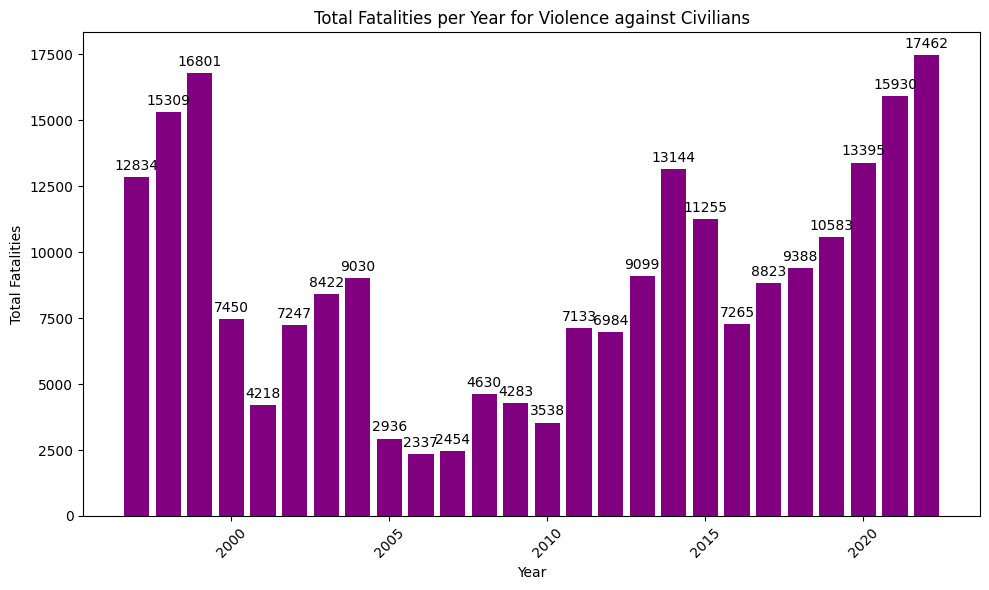

In [31]:
import matplotlib.pyplot as plt

# Assuming 'EVENT_DATE' is in the 'YYYY-MM-DD' format
cdf_filtered['YEAR'] = pd.to_datetime(cdf_filtered['EVENT_DATE']).dt.year

# Group by year and sum the fatalities
yearly_fatalities = cdf_filtered.groupby('YEAR')['FATALITIES'].sum().reset_index()
yearly_fatalities = yearly_fatalities[yearly_fatalities['YEAR'] != 2023]

# Create a bar plot
plt.figure(figsize=(10, 6))
bars = plt.bar(yearly_fatalities['YEAR'], yearly_fatalities['FATALITIES'], color='purple')
plt.xlabel('Year')
plt.ylabel('Total Fatalities')
plt.title('Total Fatalities per Year for Violence against Civilians')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Add labels to the bars
for bar in bars:
    height = bar.get_height()
    plt.annotate(f'{height}',
                 xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 3),  # 3 points vertical offset
                 textcoords='offset points',
                 ha='center', va='bottom')

plt.tight_layout()
plt.show()


In [34]:
import plotly.graph_objs as go

fig = go.Figure()

viz_df = cdf_fatalities_small
denom = 20 if viz_df.shape[0] < 1000 else 3

fig.add_trace(
    go.Scattergeo(
        lon=viz_df["LONGITUDE"],
        lat=viz_df["LATITUDE"],
        mode="markers",
        marker=dict(
            size=viz_df["FATALITIES"] / denom,  # Specify the size for each data point
            opacity=0.3, 
            color='purple',  
        ),
    )
)

fig.update_layout(
    geo=dict(
        scope="africa",
        showcoastlines=True,
        coastlinecolor="Black",
        showland=True,
        landcolor="rgb(229, 229, 229)",
        showocean=True,
        oceancolor="rgb(240, 240, 255)",
    ),
    width=800,  # Adjust the width as needed
    height=600,  # Adjust the height as needed
    title="Africa Map",
)

fig.update_geos(projection_scale=1.09, lonaxis_range=[-30, 60], lataxis_range=[-40, 40])

fig.show()

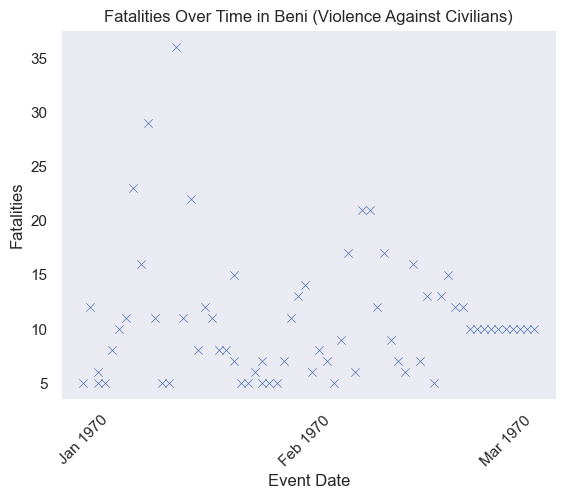

In [93]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.dates import MonthLocator, DateFormatter

sns.set(style="dark")
sns.scatterplot(data=beni, x="EVENT_DATE", y="FATALITIES", marker='x')

ax = plt.gca()
ax.xaxis.set_major_locator(MonthLocator(interval=1))  # Show ticks for each month
ax.xaxis.set_major_formatter(DateFormatter("%b %Y"))  # Format tick labels as "Month Year"


plt.title("Fatalities Over Time in Beni (Violence Against Civilians)")
plt.xlabel("Event Date")
plt.ylabel("Fatalities")
plt.xticks(rotation=45)

plt.show()